In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.inspection import DecisionBoundaryDisplay

# Elementy teorii uczenia się

Autor sekcji: {ref}`authors:filip-wojcik`

W niniejszym rozdziale przedstawione zostaną najważniejsze zagadnienia teoretyczne powiązane z teorią COLT - ang. *Computational Learning Theory*. Jest to dziedzina  zajmująca się badaniem algorytmów uczenia maszynowego, ich złożoności obliczeniowej oraz ich zdolności do generalizacji. W ramach tego rozdziału omówione zostaną kluczowe elementy takie jak przestrzeń hipotez, pojecie docelowe i generalizacja.

##   Pojęcie docelowe i hipotezy

W przypadku uczenia maszynowego, tworząc i szkoląc poszczególne modele, poruszamy się w obszarze dużej niepewności. Warto sobie zadać następujące pytania:

```{admonition} Pytania do procesu uczenia się
:class: tip

1. Skąd mamy gwarancję, że dane, na których uczymy model, są reprezentatywne dla całej populacji?
2. Skąd mamy gwarancję, że etykiety (y) przypisane do danych są poprawne i reprezentatywne dla całej populacji?
3. Skąd wiemy, czy i jaki proces odpowiada w rzeczywistości za przypisywanie etykiet do danych?
```

Wbrew pozorom, są to bardzo istotne uwagi. Nierzadko zdarza się, że nie wiemy, czy istnieje **jakakolwiek** zasada, przypisująca etykiety do danych. W takim przypadku, model, który uczymy, może być jedynie zbiorem przypadkowych reguł, które nie mają żadnego związku z rzeczywistością.

Wyobraźmy sobie przez chwilę **przestrzeń wszystkich możliwych cech obiektów**, oznaczaną jako $\mathcal{X}$ - jest to wyczerpująca lista wszelkich kombinacji cech, jakie tylko mogą wystąpić w naszych danych. W przypadku filmów, mogą to być takie cechy jak: gatunek, rok produkcji, reżyser, aktorzy, budżet, długość filmu, itd.

Obiekty w tej przestrzeni mają przypisane pewne etykiety - oznaczane jako $\mathcal{Y}$. W przypadku filmów, mogą to być takie etykiety jak: ocena Filmweb.pl, ocena IMDB, liczba nominacji do Oscara, itd.

```{glossary}
Pojęcie docelowe
    Zakładamy, że istnieje pewne wyjaśnienie - proces, funkcja, zjawisko (naturalne lub sztuczne), które przypisuje etykiety do obiektów. Tę funkcję nazywamy **funkcją docelową albo pojęciem docelowym** (ang. *target function*), oznaczaną jako $c(x): \mathcal{X} \rightarrow \mathcal{Y}$. {cite:ps}`cichosz2007systemy` {cite:ps}`wojcik2021`

Funkcja docelowa
    Niektórzy autorzy (np. {cite:ps}`abu2012learning`) posługują się terminem **funkcja docelowa** zamiast **pojęcie docelowe**. Funkcja docelowa to funkcja, która przypisuje etykiety do obiektów z zastrzeżeniem, że jest ona **zaszumiona** - może zawierać błędy, wynikające np. ze złych pomiarów, niedokładności zapisów, niedoprecyzowania pojęć, etc. W kontekście uczenia maszynowego, jest to funkcja, którą staramy się odnaleźć. Funkcję docelową oznacza się jako $f(x): \mathcal{X} \rightarrow \mathcal{Y}$ {cite:ps}`abu2012learning`

Przestrzeń hipotez
    Jest to zbiór wszystkich możliwych do wyrażenia przez określony model potencjalnych wyjaśnień danych, mających na celu odnalezienie {term}`Pojęcie docelowe`. {cite:ps}`cichosz2007systemy` {cite:ps}`wojcik2021`
```

{term}`Algorytm uczenia maszynowego`, którego używamy, żeby wyszkolić {term}`Model uczenia maszynowego` stara się stworzyć **uproszczony opis danych, które ma dostępne** w taki sposób, aby jak najlepiej odwzorować **pojęcie docelowe**. W tym kontekście, mówimy o **hipotezach**: każdy algorytm może tworzyć/reprezentować różne **hipotezy**, starając się wyjaśnić zależności w danych.

Pytanie brzmi: **czy przestrzeń hipotez generowana przez algorytm zawiera w sobie pojęcie docelowe?**

```{figure} ../images/hypothesis_diag.svg
---
width: 500px
name: hypothesis_diag
---
Ilustracja przestrzeni hipotez. Adaptacja za: {cite:ps}`learning1997tom`
```
Zewnętrzny, duży kwadrat przedstawia całą dziedzinę - przestrzeń wszystkich możliwych wartości atrybutów. Pojęcie docelowe, czyli funkcja, którą chcemy znaleźć, pokrywa część tego obszaru (owal z lewej). Model, tworzony przez określony algorytm może tworzyć różne hipotezy, które są reprezentowane przez owal po prawej stronie. Jak widać - czasem zdarza się, że przestrzeń hipotez nie pokrywa się z pojęciem docelowym: wówczas model "nie trafia" z odpowiedziami. W innych wypadkach - przestrzeń jego hipotez pokrywa się z pojęciem docelowym i wówczas otrzymujemy prawidłowe odpowiedzi.



### Przykład - przestrzeń hipotez zawiera pojęcie docelowe

Przyjrzyjmy się zbiorowi danych, prezentowanemu poniżej - każda kropka oznacza obiekt (np. klienta), opisany dwiema cechami numerycznymi (X1, X2 - np. wiek i waga). Każdy obiekt ma przypisaną etykietę (np. czy klient kupił produkt czy nie) - w tym przypadku odpowiadającą kolorowi zielonemu lub niebieskiemu.

Na pierwszy rzut oka wydaje się, że:
1. **Pojęcie docelowe istnieje** - obiekty po prawej stronie są "niebieskie" a po lewej "zielone". Istnieje zatem jakiś proces, który przypisuje etykiety do danych i jest to proces sensowny.
2. **Przestrzeń hipotez** - w tym przypadku, przestrzeń hipotez jest bardzo prosta: wystarczy narysować linię, która oddzieli obiekty zielone od niebieskich. Wówczas, model, który stworzy taką hipotezę, będzie w stanie poprawnie klasyfikować nowe obiekty.


```{admonition}
:class: tip
Zainteresowany czytelnik znajdzie fragmenty kodu potrzebne do zreprodukowania przykładów ukryte jako części notebooka.
```

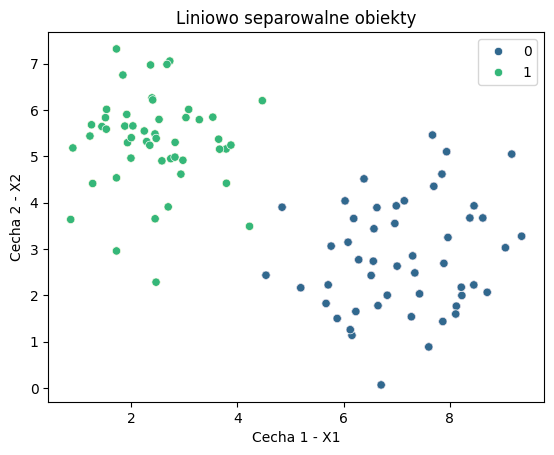

In [4]:
X_sep, y_sep = make_blobs(
    n_samples=100, centers=2, n_features=2, center_box=(0, 10), random_state=123
)
plt.scatter(X_sep[:, 0], X_sep[:, 1], marker="o", c=y_sep, s=25)
sns.scatterplot(x=X_sep[:, 0], y=X_sep[:, 1], hue=y_sep, palette="viridis")
plt.xlabel("Cecha 1 - X1")
plt.ylabel("Cecha 2 - X2")
plt.title("Liniowo separowalne obiekty");

Możemy teraz wyznaczyć kilka linii oddzielających od siebie obie strefy. Każda taka linia (formalnie: **model liniowy**) jest **hipotezą** - czyli próbą wyjaśnienia zależności w danych.

Ewidentnie jedne są lepsze od innych.

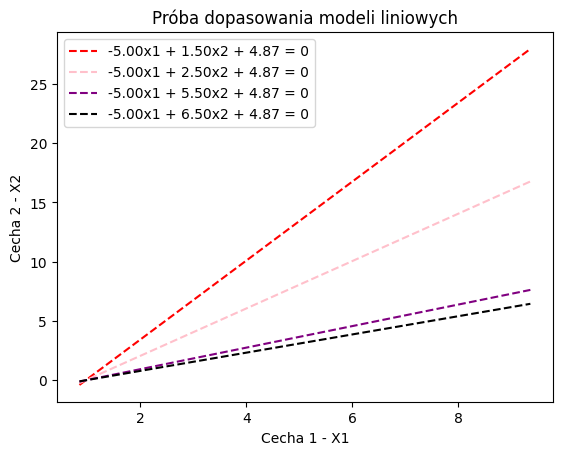

In [5]:
def make_line_from_coef(X_data: np.array, coef: np.array, intercept: np.array, col: str, ax: plt.Axes):
    # Create a range of values for x1
    x1_vals = np.linspace(X_sep[:, 0].min(), X_sep[:, 0].max(), 100)
    # Calculate the corresponding x2 values
    x2_vals = -(coef[0] * x1_vals  + intercept) / coef[1]
    line_label = f"{coef[0]:.2f}x1 + {coef[1]:.2f}x2 + {intercept[0]:.2f} = 0"
    ax.plot(x1_vals, x2_vals, color=col, linestyle='--', label=line_label)


coefs = [
    (np.array([4.87]), np.array([-5,  1.5]), 'red'),
    (np.array([4.87]), np.array([-5,  2.5]), 'pink'),
    (np.array([4.87]), np.array([-5,  5.5]), 'purple'),
    (np.array([4.87]), np.array([-5,  6.5]), 'black'),
]


fig1, ax = plt.subplots()
for intercept, coef, col in coefs:
    make_line_from_coef(X_sep, coef, intercept, col, ax)

plt.xlabel("Cecha 1 - X1")
plt.ylabel("Cecha 2 - X2")
plt.legend()
plt.title("Próba dopasowania modeli liniowych");

Jeśli pozwolimy modelowi liniowemu nauczyć się własności danych - znajdzie on w swojej **przestrzeni hipotez** najlepsze rozwiązanie, które oddzieli punkty od siebie.

Możemy to przedstawić jak na obrazku poniżej, gdzie model tworzy **płaszczyznę decyzyjną** - linię, która oddziela obiekty zielone od niebieskich.

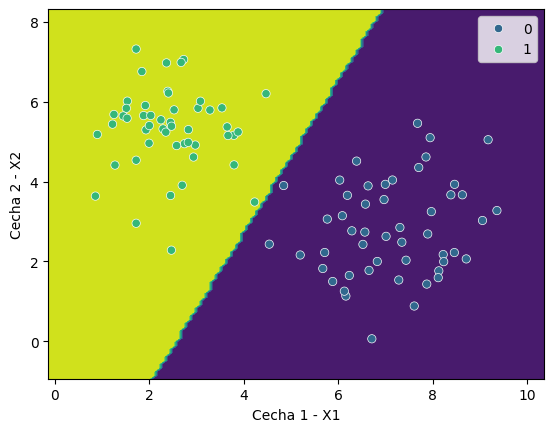

In [6]:
lr1 = LogisticRegression()
lr1.fit(X_sep, y_sep)
fig, ax = plt.subplots()
display = DecisionBoundaryDisplay.from_estimator(
    lr1,
    X_sep,
    response_method="predict",
    xlabel="Cecha 1 - X1",
    ylabel="Cecha 2 - X2",
    ax=ax,
)
sns.scatterplot(x=X_sep[:, 0], y=X_sep[:, 1], hue=y_sep, palette="viridis", ax=ax)
plt.show()

```{admonition}
:class: important
Mamy tu do czynienia z sytuacją, w której ewidentnie **przestrzeń hipotez modelu zawiera w sobie pojęcie docelowe**.
```

### Przykład - pojęcie docelowe poza przestrzenią hipotez

Rozpatrzmy kolejny przykład - bardzo niekorzystny dla naszego algorytmu liniowego. Także i tym razem mamy zbiór danych, opisany dwiema cechami numerycznymi (X1, X2) i etykietami (zielony, niebieski).Poszczególne etykiety (klasy) układają się w okrąg - co sugeruje, że nie istnieje żadna prosta, która oddzieliłaby obiekty jednej klasy od drugiej.

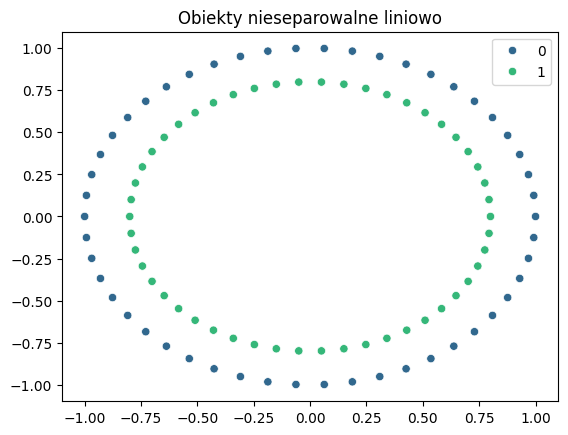

In [7]:
X_circ, y_circ = make_circles(random_state=42)

sns.scatterplot(x=X_circ[:, 0], y=X_circ[:, 1], hue=y_circ, palette="viridis");
plt.title("Obiekty nieseparowalne liniowo");

Choćbyśmy dopasowali nie wiadomo jak dobry model liniowy nie ma on najmniejszych szans sensownie oddzielić od siebie tych obiektów. W najlepszym wypadku, połowa obiektów każdej klasy znajdzie się po niewłaściwej stronie.

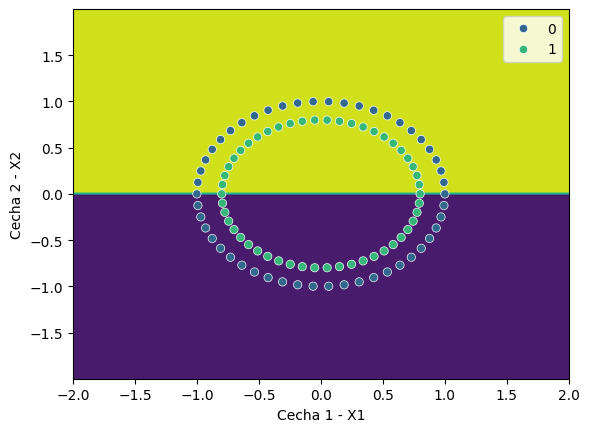

In [8]:
lr2 = LogisticRegression()
lr2.intercept_ = np.array([[0.0]])
lr2.coef_ = np.array([[0.0, 1.0]])
lr2.classes_ = np.array([0, 1])
fig, ax = plt.subplots()
display = DecisionBoundaryDisplay.from_estimator(
    lr2,
    X_circ,
    response_method="predict",
    xlabel="Cecha 1 - X1",
    ylabel="Cecha 2 - X2",
    ax=ax,
)
sns.scatterplot(x=X_circ[:, 0], y=X_circ[:, 1], hue=y_circ, palette="viridis", ax=ax)
plt.show()

## Elementy składowe procesu uczenia się

Mając na uwadze powyższe, możemy wskazać na diagramie najważniejsze elementy, składające się na proces uczenia się.

```{figure} ../images/learning_diagram.svg
---
width: 900px
name: learning_diagram
---
Składowe procesu uczenia się. Adaptacja za: {cite:ps}`mohri2012foundations`
```

Co dokładnie mamy na tym diagramie? Wszystkie elementy wymienione do tej pory. Po kolei:

1. Nieznana nam funkcja prawdopodobieństwa $P(x)$ odpowiada za losowanie przykładów. Innymi słowy: model uczy się na próbce całej populacji. Próbki są wybierane, a o tym, które trafią nam w ręce decyduje właśnie rozkład $P(x)$.
2. Nieznana funkcja docelowa lub pojęcie docelowe nadaje etykiety do obiektów. W przypadku klasyfikacji, jest to funkcja, która przypisuje obiektom klasy. To właśnie tej funkcji staramy się nauczyć, albo przybliżyć. Przykłady przytaczaliśmy już wcześniej: `co decyduje o tym, że jedne osoby mają powikłania po chorobie C a inne nie?`, `co decyduje o wzroście/spadku cen akcji?`, `co decyduje o tym, że klient kupi produkt?`.
3. Zbiór uczący się składa się z par: $\mathbf{x}_i, y_i$, czyli zestawu macierzy atrybutów i etykiet.
4. Wybieramy algorytm uczenia maszynowego, który posiada pewną przestrzeń hipotez $\mathcal{H}$ - jest to jego zdolność do wyrażania różnych zależności w danych. Przykład: model liniowy omówiony wcześniej - przestrzenią hipotez są wszystkie możliwe do narysowania proste linie.
5. Model uczy się, starając się jak najlepiej dopasować do posiadanych etykiet przykładów. Na końcu otrzymujemy hipotezę docelową $h$. **Mamy nadzieję**, że dobrze przybliża ona pojęcie docelowe.

Tym co steruje procesem uczenia się i oceną jego jakości jest **błąd generalizacji**:

````{glossary}
Błąd generalizacji
    Mając daną hipotezę $h \in \mathcal{H}$, oraz pojęcie docelowe $c \in \mathcal{C}$ oraz rozkład danych $D$ z którego pochodzą przykłady uczące, błąd generalizacji jest średnim prawdopodobieństwem, że hipoteza $h$ będzie błędna na losowym przykładzie $(x, y)$ zgodnie z rozkładem $D$. Formalnie:
    ```{math}
    R(h) = P_{(x \sim D)} \left[h(x) \neq c(x)\right] = \mathbb{E}_{x \sim D} \left[\mathbb{I}_{h(x) \neq c(x)}\right]
    ```
    gdzie $\mathbb{I}$ jest funkcją indykatorową (wskaźnikową), która przyjmuje wartość 1, gdy warunek wewnątrz jest spełniony, a 0 w przeciwnym wypadku. {cite:ps}`mohri2012foundations`

````

Z powyższych, dość mocno teoretycznych (jak dotąd) rozważań, wysuwa się jeden, bardzo istotny dla wszystkich praktyków uczenia maszynowego wniosek:

```{admonition} Uczenie maszynowe jako probabilistyczne poszukiwanie hipotez
:class: tip

W tym ujęciu, uczenia maszynowego widać, jak mocno niepewny i stochastyczny jest to proces. Niepewność pojawia się w kilku miejscach:
* **Po pierwsze** - przykłady uczące są wybierane losowo z populacji, co oznacza, że nie mamy pewności, czy są one reprezentatywne.
* **Po drugie** - etykiety przypisane do danych mogą być błędne, niepełne, lub nieodpowiednie.
* **Po trzecie** - przestrzeń hipotez, w której poruszamy się, może nie zawierać w sobie pojęcia docelowego.
* **Po czwarte** - model, który tworzymy na bazie algorytmu **PRZESZUKUJE** przestrzeń swoich hipotez próbując się dopasować do posiadanych danych uczących.

Warto mieć te elementy na uwadze, gdy klienci, kontrahenci lub osoby chcące otrzymać od nas wyniki, pytają o **pewność** naszych modeli. Warto wtedy zwrócić uwagę na to, że **nie ma pewności** - są jedynie **prawdopodobieństwa**.

```

## Obciążenie indukcyjne

Podczas wyboru najlepszego algorytmu, który posłuży nam do zbudowania modelu, naturalnym jest, że staramy sie wybrać taki, który ma jak najmniejszy błąd generalizacji. Warto w ramach tego procesu rozważyć mocne i słabe strony każdego z algorytmów, które bierzemy pod uwagę. Jak widzieliśmy we wcześniejszych przykładach, może się zdarzyć tak, że próbujemy zastosować narzędzie absolutnie nieprzystosowane do naszego problemu - np. model liniowy do rozdzielenia obiektów w kształcie okręgu.

Istnieje kilka pojęć, które posłużą nam do zdefiniowania tak rozumianych ograniczeń i możliwości algorytmów uczenia maszynowego.

```{glossary}
Obciążenie indukcyjne
    Zbiór założeń i ograniczeń algorytmu, sprawiający, że stawiane przez niego hipotezy różnią się od pojęcia docelowego lub skłaniające do preferowania jednej hipotezy nad
    inną, nazywane są zbiorczo obciążeniem indukcyjnym. {cite:ps}`cichosz2007systemy` {cite:ps}`wojcik2021`
```

Innymi słowy - {term}`Obciążenie indukcyjne` mówi nam o wszystkich czynnikach, które wpływają na to, dlaczego dany algorytm lub model, podejmuje takie decyzje, jakie podejmuje.

{term}`Obciążenie indukcyjne` występuje w dwóch najczęstszych postaciach: reprezentacji i preferencji.

```{glossary}
Obciążenie reprezentacji
    Informuje o tym, jak ograniczona jest przestrzeń hipotez, które ma do dyspozycji określony algorytm. Innymi słowy – definiuje zawężenie funkcji wyjaśniających, których system może używać do wyjaśniania zjawisk. Ten rodzaj obciążania nie daje się w łatwy sposób wyeliminować - jest bowiem wpisany w samą strukturę algorytmu. {cite:ps}`cichosz2007systemy` {cite:ps}`wojcik2021`

Obciążenie preferencji
    związane jest z heurystykami wyboru najlepszej hipotezy spośród generowanych (proponowanych) przez algorytm. Funkcje te mogą zostać zaprojektowane z użyciem takich założeń lub aparatu matematycznego, iż prowadzić będą w sposób systematyczny i powtarzalny do preferowania określonych wyborów ponad innymi. {cite:ps}`cichosz2007systemy` {cite:ps}`wojcik2021`
```

Brzmi skomplikowanie? Rozważmy kilka przykładów.

````{admonition} Ćwiczenie - obciążenie indykcyjne
:class: note
Zastanów się nad następującymi przykładami ograniczeń posiadanych przez algorytmy i modele. Które z nich dotyczą **preferowania** pewnych wyników, a które wpisane są w samą **strukturę** algorytmu/modelu?

```{dropdown} Model liniowy nie jest w stanie oddzielić danych w postaci dwóch okręgów.
Obciążenie reprezentacji. To jest prosty przykład. Model rysujący proste linie nie może **reprezentować** swoich hipotez w inny sposób.
```
```{dropdown} Model K-najbliższych sąsiadów nadaje najwyższą wagę atrybutom wyrażonym w największych jednostkach.
Obciazenie preferencji. Modele oparte na analizie odległości między obiektami są podatne jednostkę, w jakiej wyrażane są cechy. Problem ten można rozwiazac odpowiednio skalując przykłady.
```
```{dropdown} W przypadku silnej nierównowagi klas (np. 95% zdrowych osób, 5% chorych) model zawsze przewiduje klasę większościową.
Obciążenie preferencji. W przypadku, gdy obydwu klasom nadajemy taką samą wagę, nic dziwnego, że przy zaburzonej liczności, modelowi najbardziej "opłaca się" przewidywać klasę najczęstszą.
```

```{dropdown} Sieć neuronowa typu Multi-Layer-Perceptron nie może przetwarzać danych w postaci grafowej.
Obciążenie reprezentacji. Zwykła sieć neuronowa nie jest w stanie, natywnie, przetwarzać danych grafowych. Do tego celu potrzebujemy dedykowanych modeli np. sieci MPNN GNN (message passing graph neural networks).
```
````

### Przykład obciążenia indukcyjnego - obciążenia reprezentacji

Ograniczenie reprezentacji przez model liniowy, w przypadku danych układających się w kształt okręgów widzieliśmy już wcześniej. Zobaczmy teraz, jak poradzi sobie np. **drzewo decyzyjne** dla tego samego zbioru, w zależności od swojej konfiguracji - głębokości.

In [49]:
def build_dt(**kwargs):
    return DecisionTreeClassifier(**kwargs)

def fit_estimator_and_plot(builder_func, X: np.array, y: np.array, title: str, ax=None, **kwargs):
    model = builder_func(**kwargs)
    model.fit(X, y)
    if ax is None:
        fig, ax = plt.subplots()
    display = DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
        xlabel="Cecha 1 - X1",
        ylabel="Cecha 2 - X2",
        ax=ax,
    )
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="viridis", ax=ax)
    ax.set_title(title)

Proste drzewo o głębokości 2 jest niewiele lepsze od modelu liniowego.

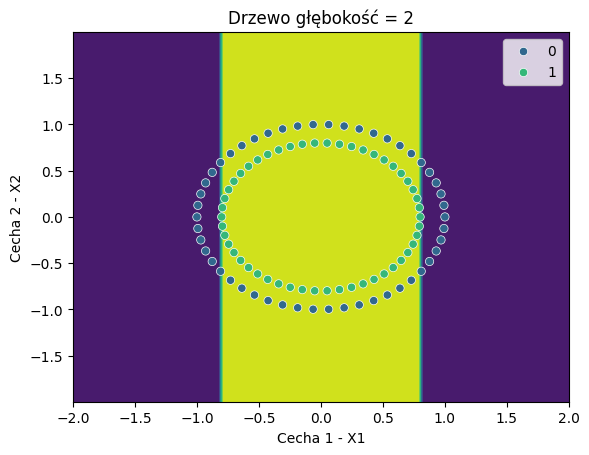

In [50]:
fit_estimator_and_plot(build_dt, X_circ, y_circ, "Drzewo głębokość = 2", max_depth=2)

W miarę zwiększania głębokości drzewa, widzimy, że stopniowo coraz lepiej radzi sobie z podziałem danych. 

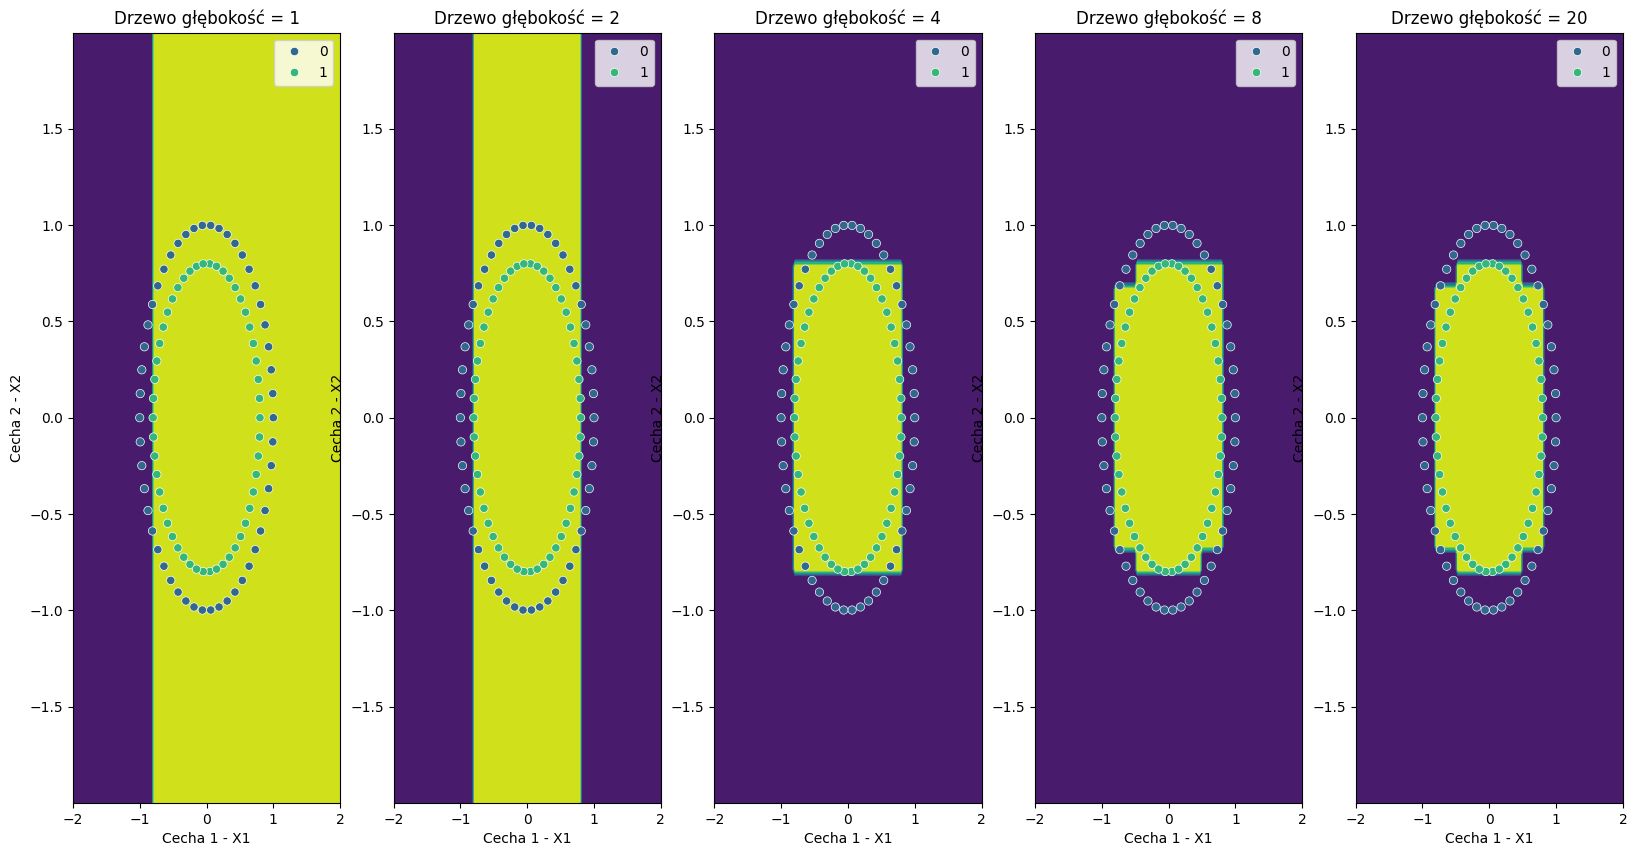

In [54]:
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
for idx, depth in enumerate([1, 2, 4, 8, 20]):
    fit_estimator_and_plot(build_dt, X_circ, y_circ, f"Drzewo głębokość = {depth}", max_depth=depth, ax=axs[idx])
plt.show()

Drzewo o głębokości 8, co prawda, nie jest w stanie idealnie oddzielić obiektów, ale już znacznie lepiej niż model liniowy.

Zwiększenie głębokości drzewa do 20 nijak nie poprawia jednak trafności - zachodzi tu więc niewielkie obciążenie reprezentacji.

Zobaczmy jednak, co się stanie, jeśli wyszkolimy model, który otrzyma bardziej złożoną przestrzeń cech - cechy X1 i X2, podniesione do kwadratu i kolejnych potęg, a także przekształcone wielomianowo.

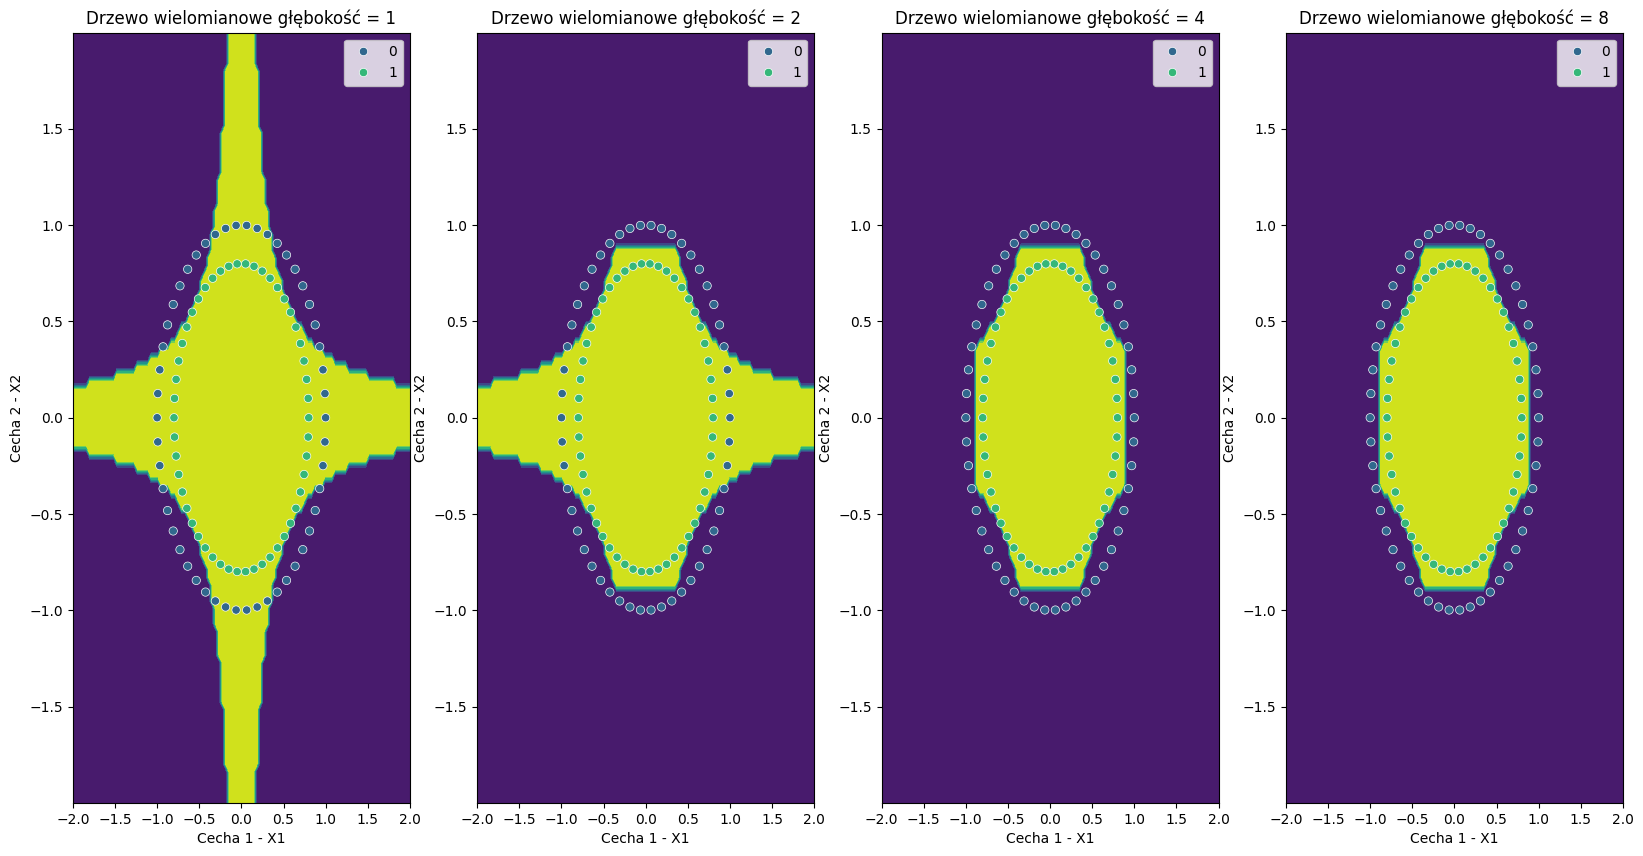

In [61]:
def build_poly_dt_pipeline(**kwargs):
    pipeline = Pipeline([
        ("poly", PolynomialFeatures(degree=4, interaction_only=False)),
        ("dt", DecisionTreeClassifier(**kwargs))
    ])
    return pipeline

fig, axs = plt.subplots(1, 4, figsize=(20, 10))
for idx, depth in enumerate([1, 2, 4, 8]):
    fit_estimator_and_plot(build_poly_dt_pipeline, X_circ, y_circ, f"Drzewo wielomianowe głębokość = {depth}", max_depth=depth, ax=axs[idx])
plt.show()

Widać, że w tym przypadku trafność znacznie się poprawiła już przy głębokości drzewa = 4. Tym samym znieśliśmy ograniczenie reprezentacji drzewa, poprzez **wzbogacenie danych źródłowych**. Jest to częsta strategia działania - nierzadko wystarczy zmienić format oryginalnych danych lub je przekształcić, by otrzymać lepsze wyniki.

## PAC-nauczalność

Tak silna obecność niepewności i elementów probabilistycznych doprowadziła do sformułowania pojęcia PAC-nauczalności (ang. *Probably - Approximately - Correct learning*). Formalna definicja przedstawia się następująco:

````{glossary}
PAC-nauczalność
    Klasa pojęć $\mathcal{C}$ jest PAC-nauczalna, jeśli istnieje algorytm $\mathcal{A}$ i funkcja wielomianowa $poly(\cdot, \cdot, \cdot, \cdot)$ taka, że dla dowolnego $\epsilon \gt 0$ oraz $\delta \gt 0$ dla wszystkich rozkładów prawdopodobieństwa $D$ dla zbioru obiektów $\mathcal{X}$ i dla każdego pojecia docelowego $c \in \mathcal{C}$ zachodzi następująca zależność dla próbki o wielkości $$m \geq poly\left(\frac{1}{\epsilon}, \frac{1}{\delta}, \text{rozmiar}(\mathcal{X}), \text{złożoność}(\mathcal{C})\right)$:
    ```{math}
    P_{S \sim D^m} \left[R(h_S) \leq \epsilon\right] \geq 1 - \delta
    ```
    gdzie $h_S$ to hipoteza wygenerowana przez algorytm $\mathcal{A}$ na podstawie próbki uczącej $S$ o rozmiarze $m$, a $R(h_S)$ to błąd generalizacji hipotezy $h_S$. {cite:ps}`mohri2012foundations`

Efektywna PAC-nauczalność
    Jeśli algorytm $\mathcal{A}$ działa w czasie $poly(\cdot, \cdot, \cdot, \cdot)$, to klasa pojęć $\mathcal{C}$ jest efektywnie PAC-nauczalna. {cite:ps}`mohri2012foundations`

````

Powyższe definicje mogą się początkowo wydawać skomplikowane, ale ich znaczenie jest *de facto* dość proste.

```{admonition} PAC-nauczalność, czyli co?
:class: tip
**PAC-nauczalność** oznacza, że dla dowolnego pojęcia docelowego $c$ z klasy $\mathcal{C}$, istnieje algorytm $\mathcal{A}$, który potrafi nauczyć się tego pojęcia, a prawdopodobieństwo, że popełni błąd mniejszy niż $\epsilon$ wynosi co najmniej $1 - \delta$. W praktyce oznacza to, że mamy pewność, że nasz model jest w stanie nauczyć się pojęcia docelowego z pewnym prawdopodobieństwem.
Kluczowe staje się zwrócenie uwagi na znaczenie poszczególnych słów ze skrótu PAC. Zrobimy to w kolejności zgodnej z intuicyjnym zrozumieniem:
1. **Approximately** (w przybliżeniu) - model nie musi być idealny, ale musi być blisko prawdy. O tym, jaki błąd jest dopuszczalny mówi parametr $\epsilon$. Na przykład, jeśli zakładamy $\epsilon = 0.05$, to oznacza, że model może popełnić błąd w 5% przypadków.
2. **Probably** (prawdopodobnie) - mówi o tym, jakie jest prawdopodobieństwo, że model popełni błąd mniejszy niż $\epsilon$. O tym decyduje parametr $\delta$. Na przykład, jeśli zakładamy $\delta = 0.01, 1-\delta = 0.99$, to oznacza, że mamy 99% pewności, że nasz model popełni błąd nie większy niż $\epsilon$ (w tym przypadku: 5%).
3. **Correct** (poprawny) - model musi być poprawny, czyli musi być w stanie nauczyć się pojęcia docelowego, a zatem minimalizuje błąd generalizacji.

Jak widzimy, **najlepsze**, co możemy dostać w przypadku PAC-nauczalności, to założenie, że model **nie popełni błędu większego niż założony $\epsilon$, nie częściej niż z prawdopodobieństwem $\delta$**.

Takie ujęcie uczenia maszynowego jest dość daleko od pragnienia posiadania zawsze idealnych, albo prawie idealnych modeli, które działają poprawnie. W praktyce, mamy do czynienia z nieredukowalnym ryzykiem i niepewnością.
```

Dodatkowym aspektem, obecnym w przestawionej definicji jest **wielkość próbki uczącej m** oraz, na razie niezdefiniowana, **funkcja wielomianowa** decydująca o czasie wykonywania algorytmu.
